In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [101]:
# Import neighborhood data
neighborhood_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/old_dataset.csv')
neighborhood_data = neighborhood_data.iloc[:, 1:6]
neighborhood_data.head()

,id,borough,neighborhood,longitude,latitude
0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705
1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294
2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556
3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437
4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834


In [114]:
# Import venue data within 1km of each neighborhood
features_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/data/all_features_counts_V3.csv')
features_data = features_data.iloc[:, 2:]
features_data = features_data.rename(columns={'index': 'id'})
features_data.head()

,id,lodging,restaurant,school,health,bar,church,bank,store,clothing,...,pharmacy,farmersmarket,foodtours,bowling,syrian,southafrican,eventservices,bookstores,homedecor,diyfood
0,nyu_2451_34572.0,9,55,26,13,10,60,12,36,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nyu_2451_34572.1,5,39,26,7,4,25,15,37,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nyu_2451_34572.2,3,33,16,3,11,23,4,36,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nyu_2451_34572.3,2,54,27,7,14,5,24,19,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nyu_2451_34572.4,3,20,25,9,16,12,23,19,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Check for missing data
total = features_data.isnull().sum().sort_values(ascending=False)
percent = (features_data.isnull().sum()/features_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
id,0,0.0
ukrainian,0,0.0
dimsum,0,0.0
uzbek,0,0.0
taiwanese,0,0.0


In [103]:
# Create function to find the most common venues per neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [104]:
# Create new dataframe for most common venues
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
features_sorted = pd.DataFrame(columns=columns)
features_sorted['id'] = features_data['id']

for ind in np.arange(features_data.shape[0]):
    features_sorted.iloc[ind, 1:] = return_most_common_venues(features_data.iloc[ind, :], num_top_venues)

features_sorted.head()

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.0,church,restaurant,store,school,clothing
1,nyu_2451_34572.1,restaurant,store,clothing,school,church
2,nyu_2451_34572.2,store,restaurant,church,school,clothing
3,nyu_2451_34572.3,restaurant,school,bank,park,store
4,nyu_2451_34572.4,school,bank,restaurant,store,park


In [119]:
total = features_sorted.isnull().sum().sort_values(ascending=False)
percent = (features_sorted.isnull().sum()/features_sorted.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
id,0,0.0
1st Most Common Venue,0,0.0
2nd Most Common Venue,0,0.0
3rd Most Common Venue,0,0.0
4th Most Common Venue,0,0.0


### K-Means

In [120]:
# Drop neighborhood ID to create numerical data for k-means clustering
features_clustering = features_data.drop('id', axis=1)

In [121]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_clustering))
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,0.209833,0.497484,-0.281050,0.168836,-0.397033,1.401403,-0.520885,-0.346817,-0.259182,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
1,-0.178723,-0.367460,-0.281050,-0.403089,-0.710156,-0.236601,-0.347004,-0.293218,0.477897,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
2,-0.373000,-0.691814,-0.766385,-0.784372,-0.344845,-0.330201,-0.984567,-0.346817,-0.554014,-0.394861,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
3,-0.470139,0.443425,-0.232517,-0.403089,-0.188284,-1.172603,0.174638,-1.258001,-0.996261,0.244438,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
4,-0.373000,-1.394580,-0.329584,-0.212447,-0.083909,-0.845002,0.116678,-1.258001,-0.947122,-0.181762,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726


In [122]:
total = features_scaled.isnull().sum().sort_values(ascending=False)
percent = (features_scaled.isnull().sum()/features_scaled.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
0,0,0.0
155,0,0.0
157,0,0.0
158,0,0.0
159,0,0.0


In [123]:
# Create elbow graph function
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

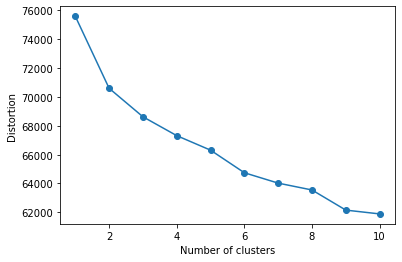

In [125]:
# Plot elbow graph
plot_distortion(features_scaled)

In [126]:
# Cluster data points using kmeans and get labels
kclusters_features = 8

kmeans_features = KMeans(n_clusters=kclusters_features, random_state=0).fit(features_clustering)

kmeans_features.labels_[0:10] 

array([5, 1, 7, 7, 7, 6, 6, 1, 6, 5], dtype=int32)

In [127]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

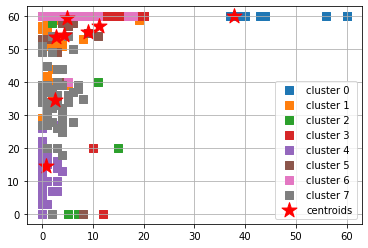

In [128]:
y_km_features = kmeans_features.fit_predict(features_clustering)
plot_clusters(np.array(features_clustering), y_km_features, plt_cluster_centers= True)

In [130]:
# Add cluster labels to venue data
features_sorted.insert(0, 'clusters', kmeans_features.labels_)
clusters = features_sorted.clusters.tolist()

# Merge venue data with neighborhood data
all_features_data = neighborhood_data.copy()
all_features_data = pd.merge(all_features_data, features_sorted, on='id')
all_features_data = all_features_data.drop('id', axis=1)

all_features_data.head()

,borough,neighborhood,longitude,latitude,clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,-73.847201,40.894705,1,restaurant,store,clothing,school,church
1,Bronx,Co-op City,-73.829939,40.874294,7,store,restaurant,church,school,clothing
2,Bronx,Eastchester,-73.827806,40.887556,7,restaurant,school,bank,park,store
3,Bronx,Fieldston,-73.905643,40.895437,7,school,bank,restaurant,store,park
4,Bronx,Riverdale,-73.912585,40.890834,6,store,restaurant,school,bank,park


In [131]:
total = all_features_data.isnull().sum().sort_values(ascending=False)
percent = (all_features_data.isnull().sum()/all_features_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
borough,0,0.0
neighborhood,0,0.0
longitude,0,0.0
latitude,0,0.0
clusters,0,0.0


### Mapping

In [132]:
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

In [133]:
# Create a map of new york

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [136]:
# Plot clusters on map of New York
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_features)
ys = [i + x + (i*x)**2 for i in range(kclusters_features)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_features_data['latitude'], all_features_data['longitude'], all_features_data['neighborhood'],all_features_data['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters